<a href="https://colab.research.google.com/github/glombardo/Decoding-Consumer-Profiles-via-Big-Five-Traits/blob/main/PCA_Follow_Up_Decoding_Consumer_Profiles_via_Big_Five_Traits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install tools and import data

In [1]:
!pip install pca

In [2]:
import pandas as pd # data wrangling
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # graphs
from sklearn.cluster import KMeans # K-Means clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # Agglomerative hierarchical clustering
from sklearn.preprocessing import StandardScaler # scaling data for analysis
from sklearn.pipeline import make_pipeline # creating data analysis pipelines that are easier to process
from sklearn.manifold import TSNE # T-SNE methods
from yellowbrick.cluster import KElbowVisualizer # Visualization
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

csv_file_path = 'personality_data_2025.csv'  # Update the path
df = pd.read_csv(csv_file_path, skiprows=[1, 2])
#df

## Clean and address missing data with a focus on the 50 questions of the Big-5 personality test.

In [3]:
data_subset = df[['Q1', 'Q9', 'Q14', 'Q19', 'Q24', 'Q29', 'Q34', 'Q39', 'Q45', 'Q50',
                  'Q4', 'Q10', 'Q15', 'Q20', 'Q25', 'Q30', 'Q35', 'Q40', 'Q46', 'Q51',
                  'Q6', 'Q11', 'Q16', 'Q21', 'Q26', 'Q31', 'Q36', 'Q41','Q47','Q52',
                  'Q7', 'Q12', 'Q17', 'Q22', 'Q27', 'Q32', 'Q37', 'Q42', 'Q48', 'Q53',
                  'Q8', 'Q13', 'Q18', 'Q23', 'Q28', 'Q33', 'Q38', 'Q43', 'Q49', 'Q54']]

data_subset = data_subset.dropna(inplace=False)
data_subset.describe()

columns_to_scale = ['Q1', 'Q9', 'Q14', 'Q19', 'Q24', 'Q29', 'Q34', 'Q39', 'Q45', 'Q50',
                  'Q4', 'Q10', 'Q15', 'Q20', 'Q25', 'Q30', 'Q35', 'Q40', 'Q46', 'Q51',
                  'Q6', 'Q11', 'Q16', 'Q21', 'Q26', 'Q31', 'Q36', 'Q41','Q47','Q52',
                  'Q7', 'Q12', 'Q17', 'Q22', 'Q27', 'Q32', 'Q37', 'Q42', 'Q48', 'Q53',
                  'Q8', 'Q13', 'Q18', 'Q23', 'Q28', 'Q33', 'Q38', 'Q43', 'Q49', 'Q54']
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data_subset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale)

##What components are present in the data? What questions seem to map well?
- due to the low variance explained by each component, I would retain up to 25 PC's (~80% of cumulative explained variance)
- below are the questions mapped. It seems that "I spend time reflecting on things" and "I feel little concern for others" are the only ones that repeat across other components (marked with a "*")

0 PC1 Q14 0.276579 best --> I feel comfortable around people 1 PC2 Q17 0.284896 best --> I worry about things 2 PC3 Q31 0.331615 best --> I often forget to put things back in their proper place 3 PC4 Q25 0.327296 best --> I am not interested in other people's problems 4 PC5 Q33 0.318873 best --> I do not have a good imagination 5 PC6 Q23 0.408359 best --> I am not interested in abstract ideas 6 PC7 Q43 0.361714 best --> I use difficult words 7 PC8 Q41 0.325245 best --> I shirk my duties 8 PC9 Q52 0.360604 best --> I am exacting in my work 9 PC10 Q40 0.421491 best --> I take time out for others 10 PC11 Q4 0.456730 best --> I feel little concern for others* 11 PC12 Q27 0.447212 best --> I am easily disturbed 12 PC13 Q51 0.416708 best --> I make people feel at ease 13 PC14 Q26 0.429311 best --> I get chores done right away 14 PC15 Q49 0.407751 best --> I spend time reflecting on things* 15 PC16 Q38 0.378064 best --> I am quick to understand things 16 PC17 Q15 0.350210 best --> I insult people 17 PC18 Q4 0.309308 best --> I feel little concern for others* 18 PC19 Q45 0.446029 best --> I don't mind being the center of attention 19 PC20 Q50 0.360171 best --> I am quiet around strangers 20 PC21 Q1 0.398535 best --> I am the life of the party 21 PC22 Q49 0.254201 best --> I spend time reflecting on things* 22 PC23 Q29 0.473894 best --> I have little to say 23 PC24 Q36 0.326159 best --> I like order 24 PC25 Q7 0.358133 best --> I get stressed out easily

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [50] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[25]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[21-05-2025 21:38:03] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[21-05-2025 21:38:05] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >Plot PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
      PC feature   loading  type
0    PC1     Q14  0.276579  best
1    PC2     Q17  0.284896  best
2    PC3     Q31  0.331615  best
3    PC4     Q25  0.327296  best
4    PC5     Q33  0.318873  best
5    PC6     Q23  0.408359  best
6    PC7     Q43  0.361714  best
7    PC8     Q41  0.325245  best
8    PC9     Q52  0.360604  best
9   PC10     Q40  0.421491  best
10  PC11      Q4  0.456730  best
11  PC12     Q27  0.447212  best
12  PC13     Q51  0.416708  best
13  PC14     Q26  0.429311  best
14  PC15     Q49  0.407751  best
15  PC16     Q38  0.378064  best
16  PC17     Q15  0.350210  best
17  PC18      Q4  0.309308  best
18  PC19     Q45  0.446029  best
19  PC20     Q50  0.360171  best
20  PC21      Q1  0.398535  best
21  PC22     Q49  0.254201  best
22  PC23     Q29  0.473894  best
23  PC24     Q36  0.326159  best
24  PC25      Q7  0.3581

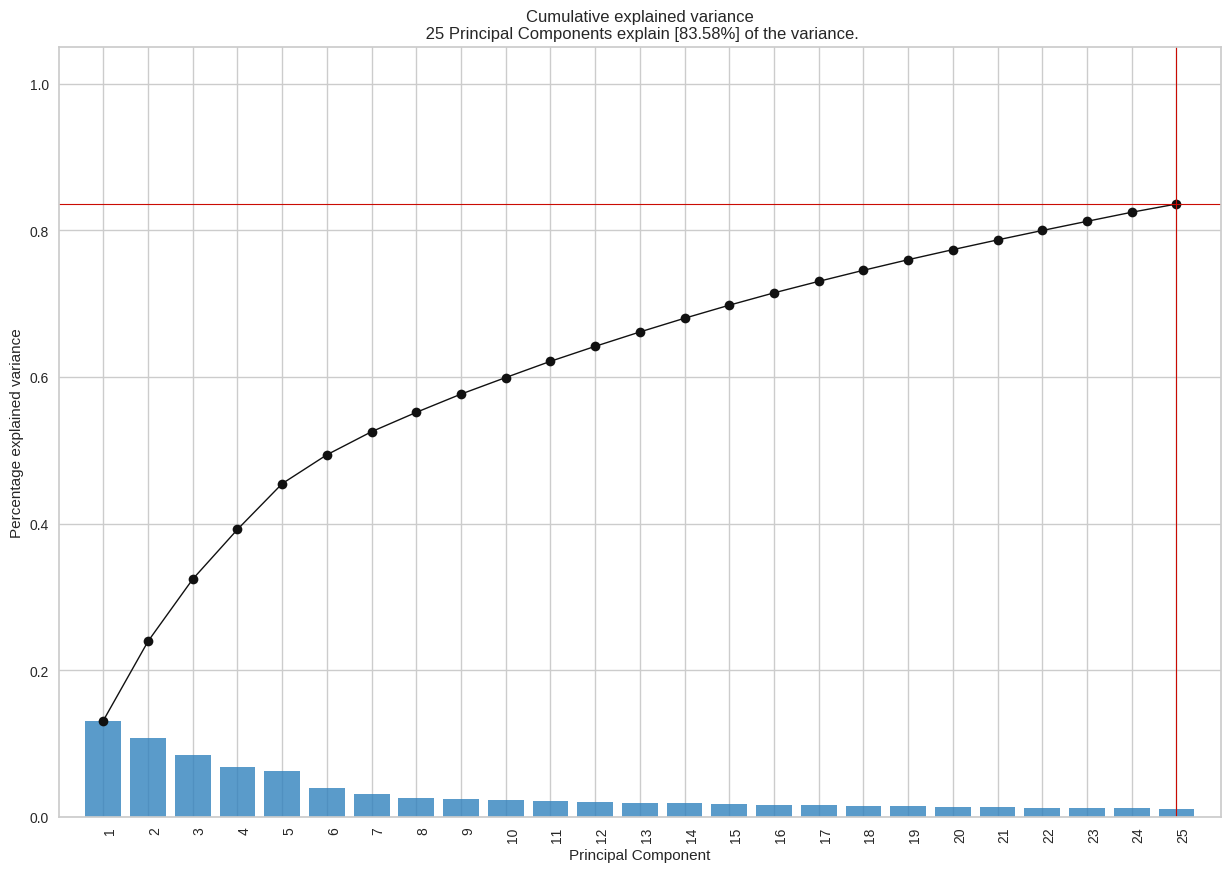

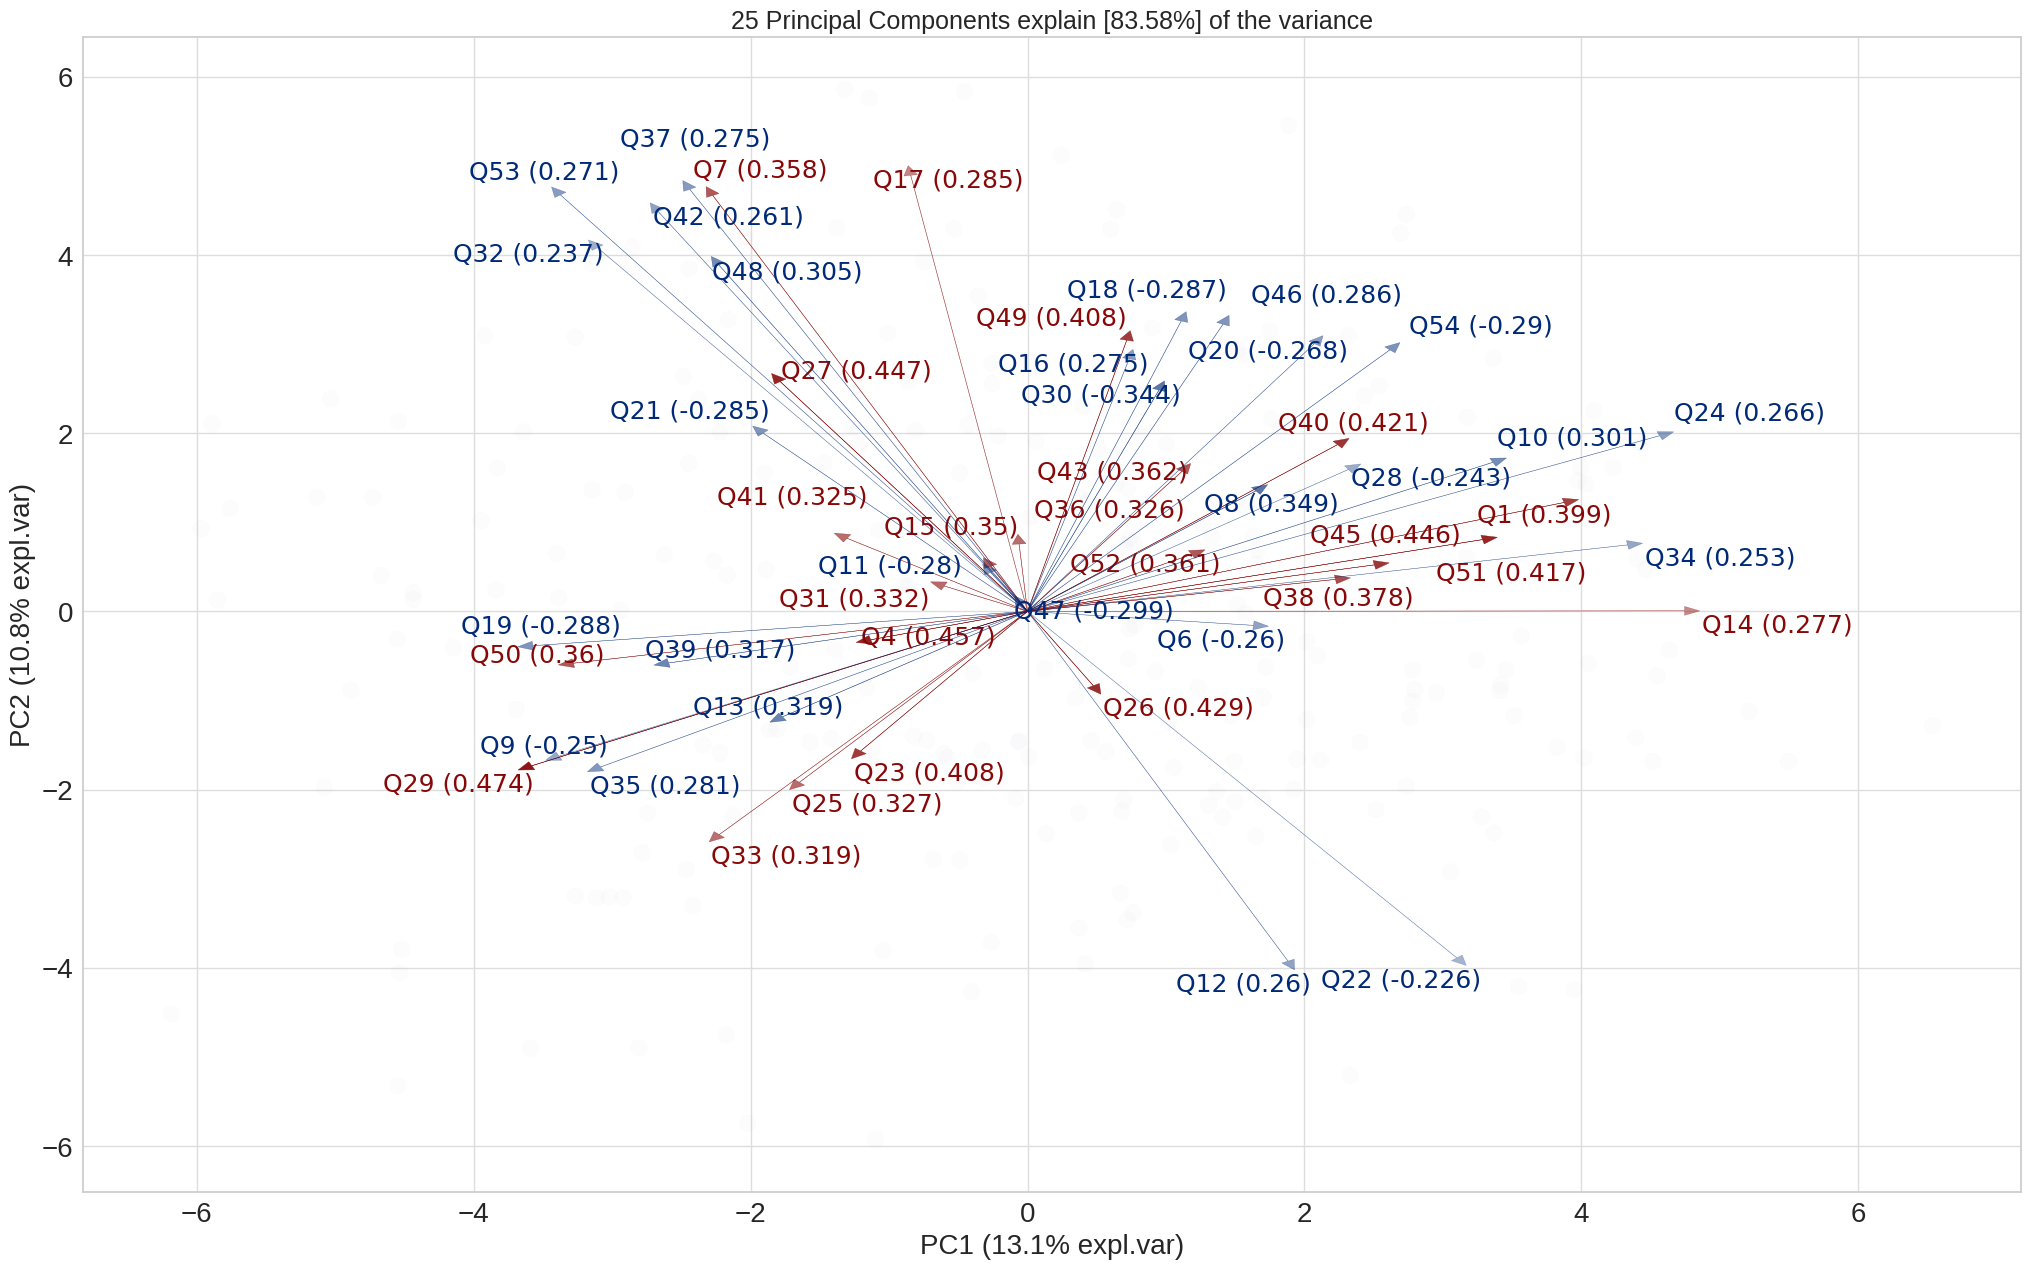

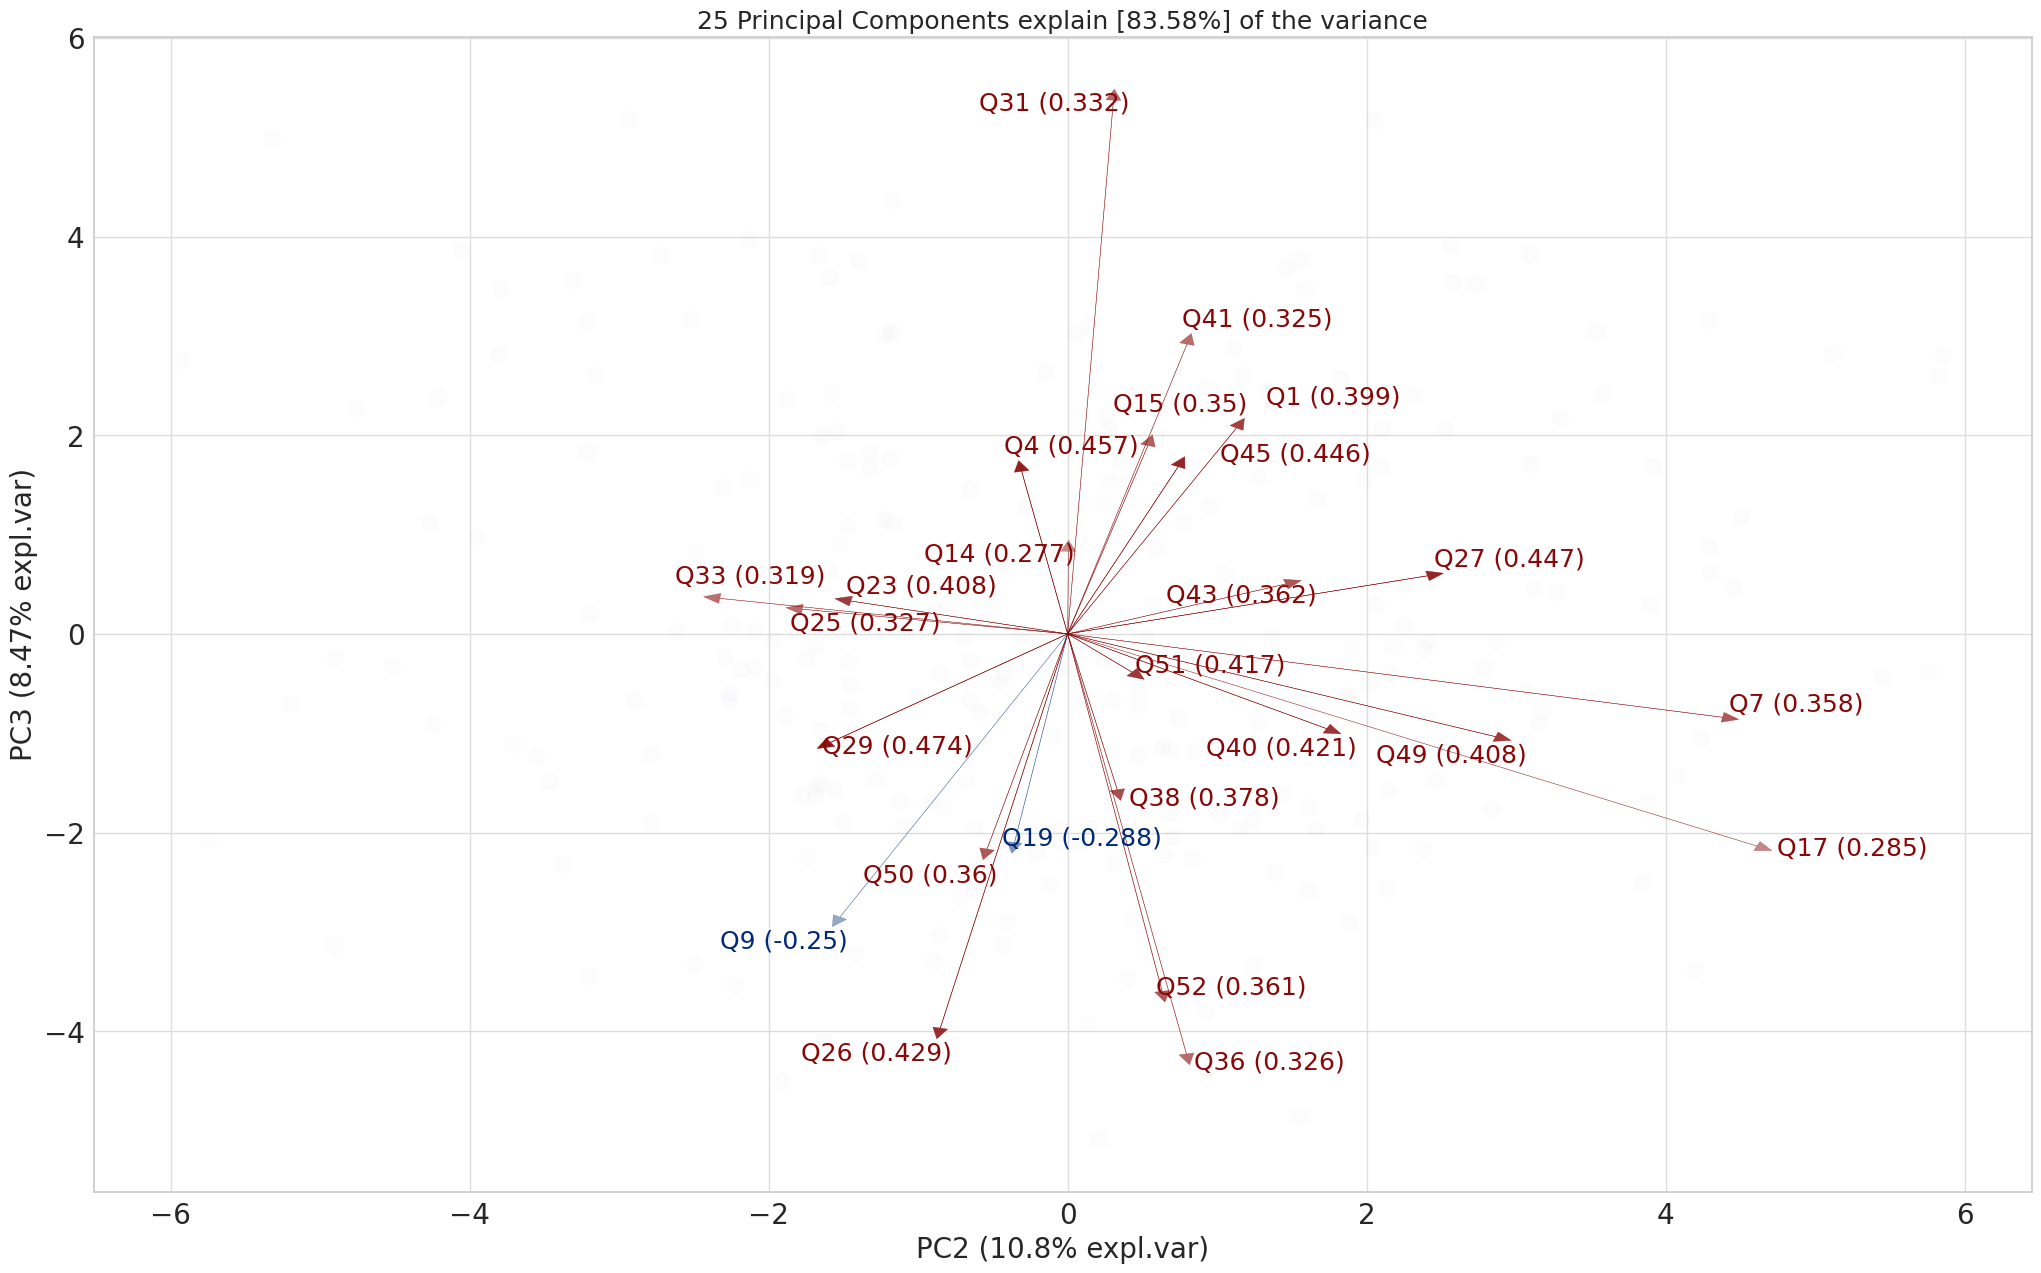

In [4]:
from pca import pca
model = pca(n_components=25)
results = model.fit_transform(X=scaled_df)
results['PC']
model.plot()
model.biplot(alpha = 0.01, n_feat = 50)
model.biplot(alpha = 0.01, PC = [1,2])
print(model.results['topfeat'])